# PCA workshop - supplementary

This workshop has been presented on September 19th, 2019, during the Python User Group meeting at OUHSC/OMRF.

This notebook includes the code used to generate the presentation figures.

In [11]:
import numpy as np
import pandas as pd
from scipy.linalg import cholesky
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")

In [12]:
def generate_example_data(seed=3):
    corr_mat= np.array([[0.5, 0.4],
                        [0.4, 0.9]])
    upper_chol = cholesky(corr_mat)
    np.random.seed(seed)
    rnd = np.random.normal(20.0, 4.0, size=(100, 2))
    return pd.DataFrame(rnd @ upper_chol.T, columns = ["var1", "var2"])

In [13]:
example_data1 = generate_example_data()

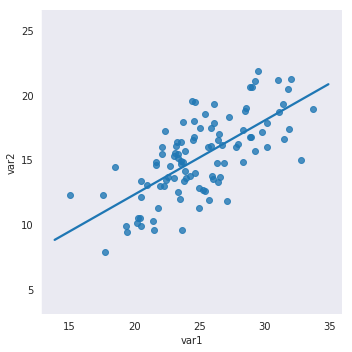

In [14]:
g = sns.lmplot(data=example_data1, x = "var1", y="var2", fit_reg=True, ci=False)
plt.axis('equal')
plt.show()

In [5]:
A = example_data1
M = np.mean(A, axis=0)
C = pd.DataFrame(A - M, columns = example_data1.columns)
V = np.cov(C.T)

values, vectors = np.linalg.eig(V) # this may take a while to compute
explaned_variance_ratio = [i/sum(values) for i in values]

P = vectors.T.dot(C.T)
P = pd.DataFrame(P.T, columns = ["PC1", "PC2"])

In [6]:
var1 = np.var(C["var1"])
var2 = np.var(C["var2"])
print("Variable 1 explains", "{0:.0%}".format(var1/(var1+var2),2), "of variability")
print("Variable 2 explains", "{0:.0%}".format(var2/(var1+var2),2), "of variability")

Variable 1 explains 59% of variability
Variable 2 explains 41% of variability


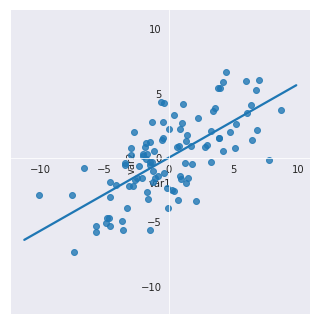

In [7]:
g = sns.lmplot(data=C, x = "var1", y="var2", fit_reg=True, ci=False)
ax = g.axes[0,0]
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
plt.axis('equal')
plt.show()

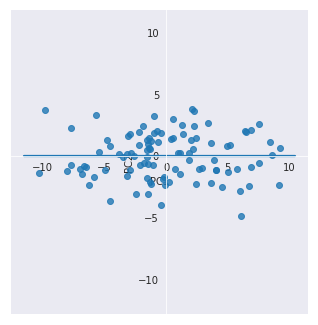

In [8]:
g = sns.lmplot(data=P, x = "PC1", y="PC2", fit_reg=True, ci=False)
ax = g.axes[0,0]
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
plt.axis('equal')
plt.show()

In [9]:
var1 = np.var(P["PC1"])
var2 = np.var(P["PC2"])
print("PC1 explains", "{0:.0%}".format(var1/(var1+var2),2), "of variability")
print("PC2 explains", "{0:.0%}".format(var2/(var1+var2),2), "of variability")

PC1 explains 85% of variability
PC2 explains 15% of variability


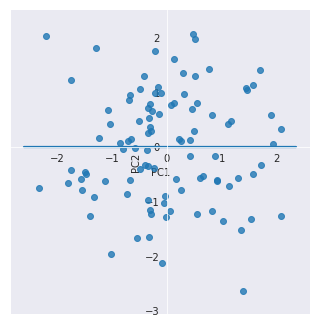

In [10]:
g = sns.lmplot(data=P.apply(lambda x: x/np.std(x)), x = "PC1", y="PC2", fit_reg=True, ci=False)
ax = g.axes[0,0]
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
plt.axis('equal')
plt.show()

---



## Contact
Author: Aleksandra Perz (OMRF/OUHSC) perz.aleksandra@gmail.com